In [6]:
import numpy as np
from scipy.misc import imread, imresize
from scipy.io import loadmat
import pickle
from lasagne.objectives import squared_error
from utils import collect_data, load_data, plot_img_dep, rmse, norm
import matplotlib.pyplot as plt
volume_path = '../data'
%matplotlib inline
%load_ext autoreload

%autoreload 2
images, dmaps = collect_data(volume_path, 'data2')
num_images = 5
X_test, y_test = load_data(images, dmaps)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
volume_path ../data data2
FOUND 100 matching images and depths
loading 100 images and depthmaps


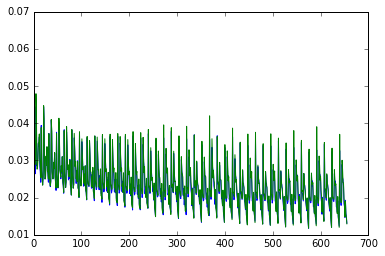

In [13]:
lp = pickle.load(open('trained/pda_e040.pkl', mode='rb'))
train_function = lp['train_function']
predict_function = lp['predict_function']
valid_function = lp['valid_function']
vl = lp['valid_losses']
tl = lp['train_losses']
plt.figure()
plt.plot(vl)
plt.plot(tl)

../data/data2/small_images/img-combined1-p-139t0.jpg
../data/data2/depthmaps/depth-combined1-p-139t0.mat
rmse 0.295084899451 0.0 -0.0343068 0.693147 0.70618
float32 float32 float32


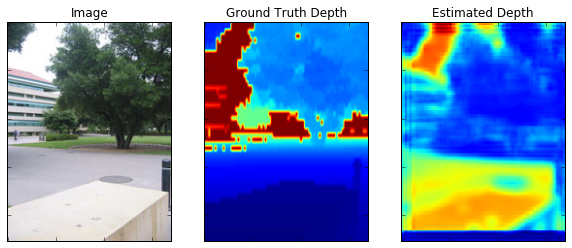

array([[ 0.10418335,  0.10418335,  0.10418335, ...,  0.1757642 ,
         0.1757642 ,  0.1757642 ],
       [ 0.10418335,  0.10418335,  0.10418335, ...,  0.1757642 ,
         0.1757642 ,  0.1757642 ],
       [ 0.10418335,  0.10418335,  0.10418335, ...,  0.1757642 ,
         0.1757642 ,  0.1757642 ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.01941814,
         0.01941814,  0.01941814],
       [ 0.        ,  0.        ,  0.        , ...,  0.01941814,
         0.01941814,  0.01941814],
       [ 0.        ,  0.        ,  0.        , ...,  0.01941814,
         0.01941814,  0.01941814]], dtype=float32)

In [11]:
inum = 5
print(images[1])
print(dmaps[1])
test_img = X_test[inum,:,:,:][None,:,:,:]
dpredict = predict_function(test_img)   
igt = X_test[inum,:,:,:].transpose(1,2,0)
dgt = y_test[inum,0,:,:]
dgt1 = norm(dgt)
dout = dpredict[inum,0,:,:]
dout1 = norm(dout)
print('rmse', rmse(dgt,dout), dgt.min(), dout.min(), dgt.max(), dout.max())
#Plot
iimg = imread(images[inum])
odep = loadmat(dmaps[inum])['depthMap']
rodep = imresize(odep, iimg.shape[:2])
plot_img_dep(igt, dgt1, dout1)
dgt


In [ ]:
189*3